In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Income Evaluation.csv')

In [3]:
#Data Exploration
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education_num   32561 non-null  int64 
 5    marital_status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital_gain    32561 non-null  int64 
 11   capital_loss    32561 non-null  int64 
 12   hours_per_week  32561 non-null  int64 
 13   native_country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.corr()['age'].sort_values(ascending=False)

age                1.000000
 capital_gain      0.077674
 hours_per_week    0.068756
 capital_loss      0.057775
 education_num     0.036527
 fnlwgt           -0.076646
Name: age, dtype: float64

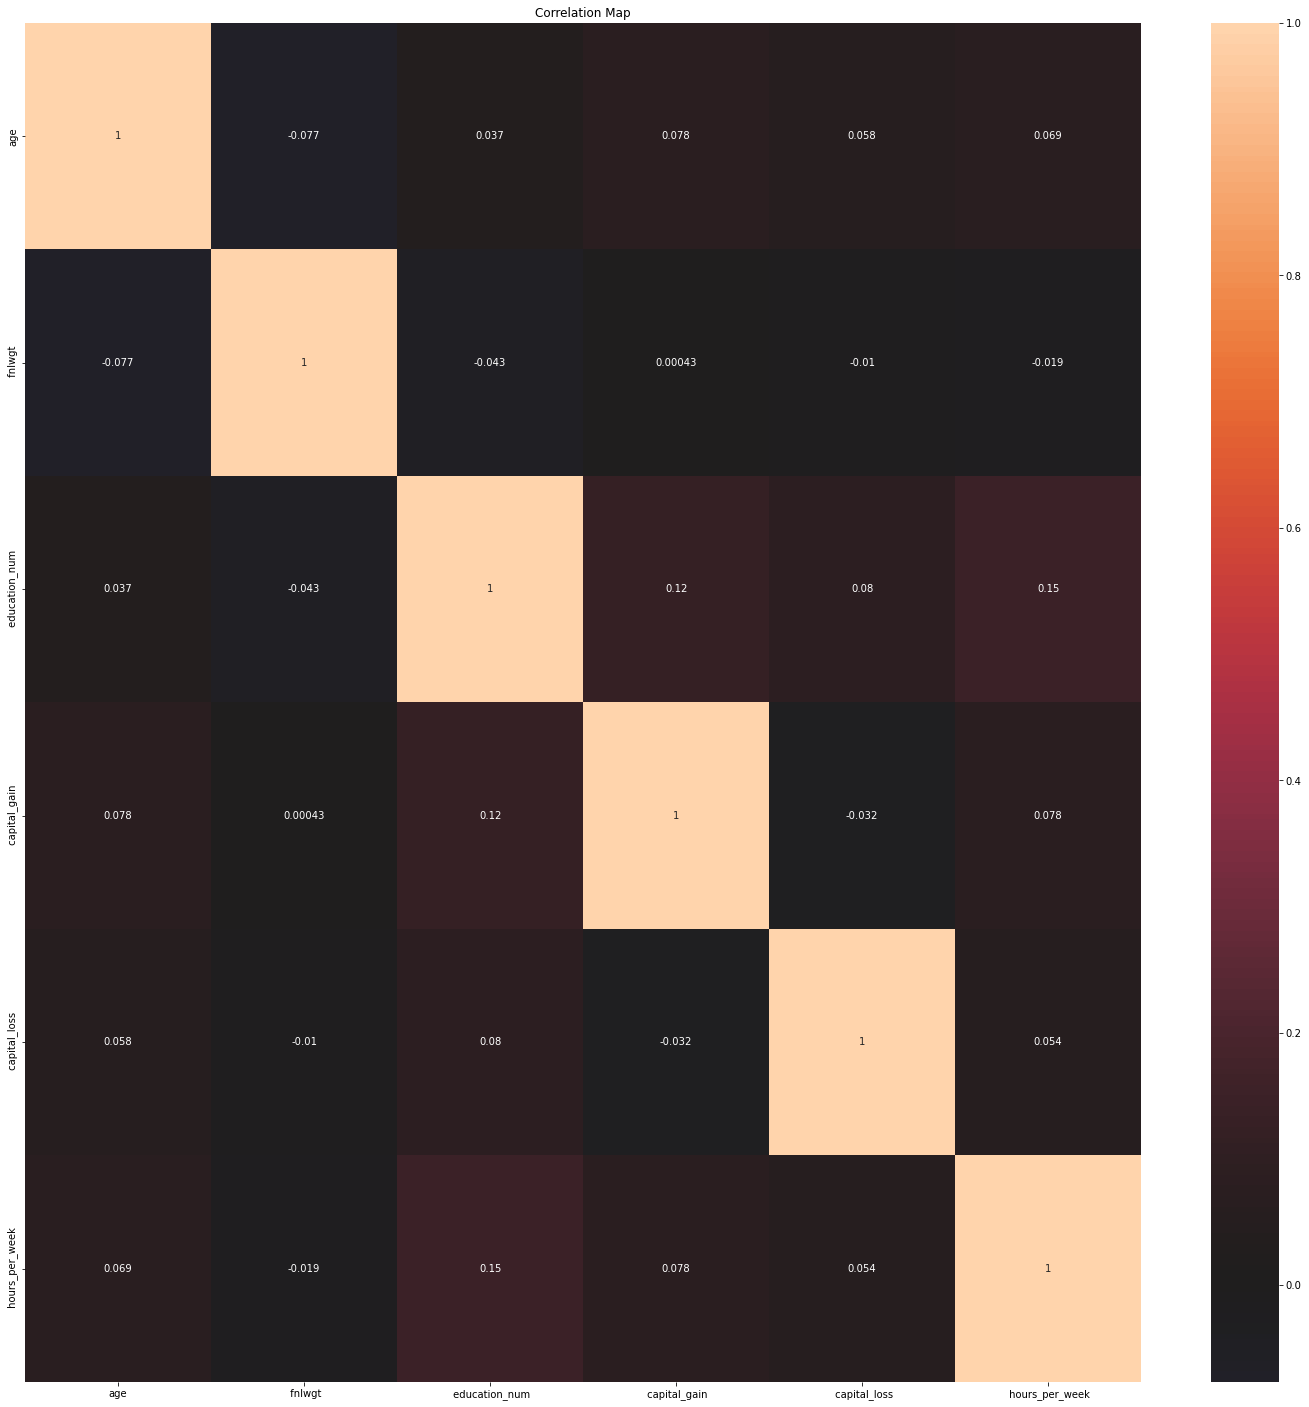

In [8]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title("Correlation Map")
plt.show()

In [9]:
num_atr=[' education_num',' capital_gain',' capital_loss',' hours_per_week']

cat_atr=[' workclass',' education',' marital_status',' occupation',' relationship',' race',' sex',' native_country']

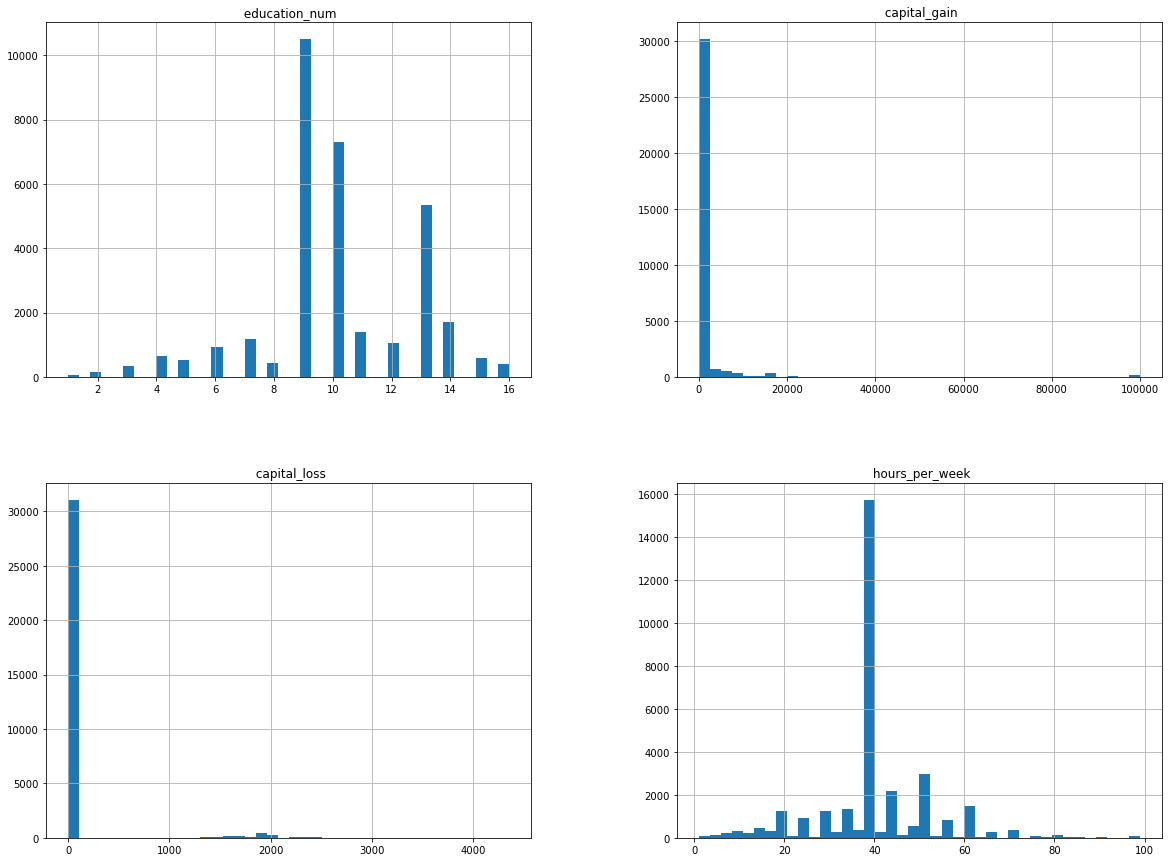

In [10]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

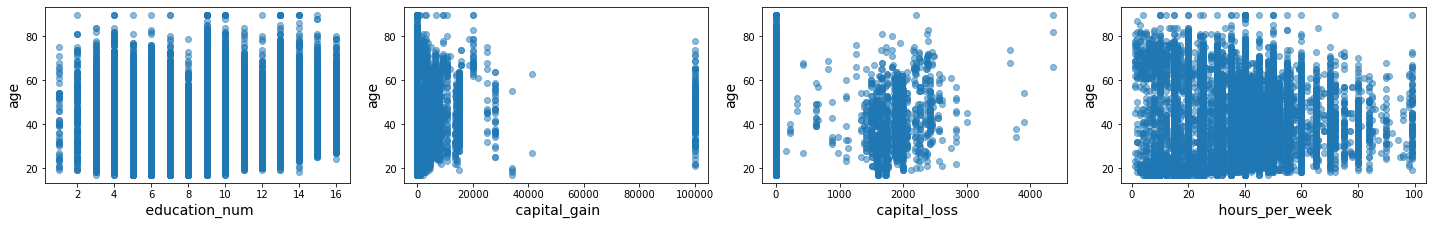

In [11]:
plt.figure(figsize=(20,12))
x=1
for i in num_atr:
    plt.subplot(4,4,x)
    plt.scatter(data=df,y='age',x=i,alpha=0.5)
    plt.ylabel('age',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1

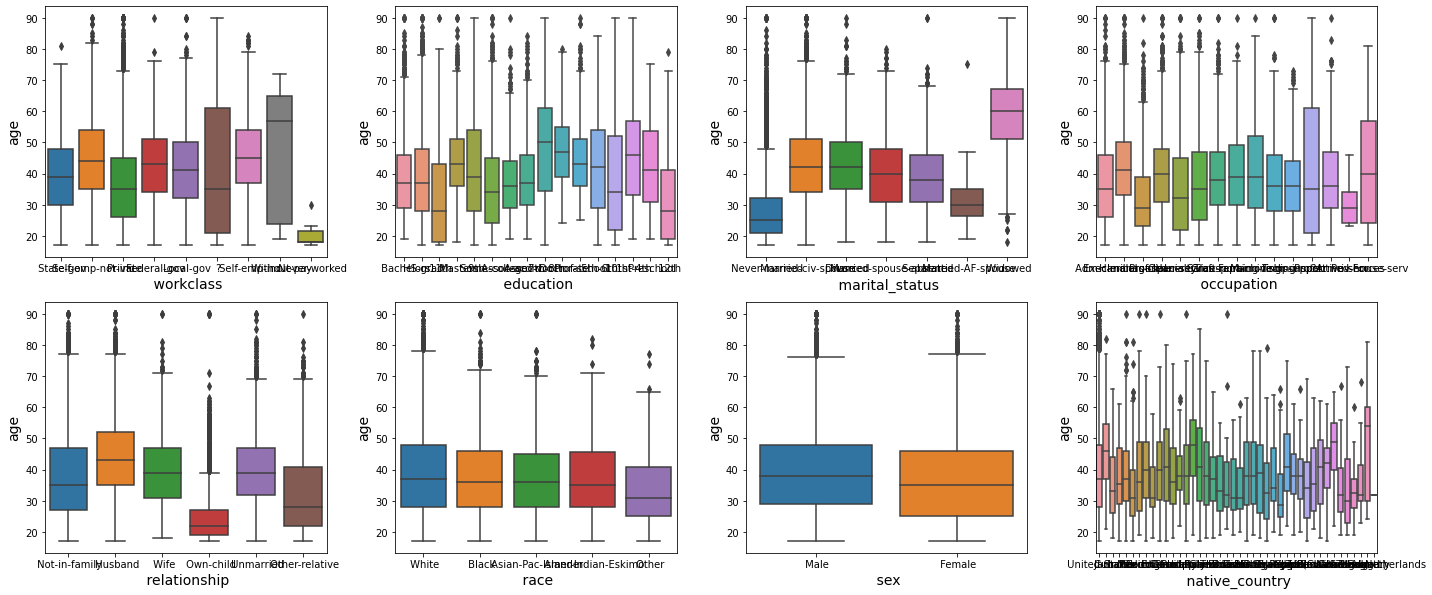

In [12]:
plt.figure(figsize=(20,12))
x=1
for i in cat_atr:
    plt.subplot(3,4,x)
    sns.boxplot(data=df,y='age',x=i)
    plt.ylabel('age',fontsize=14)
    plt.xlabel(i,fontsize=14)
    plt.tight_layout()
    x=x+1
plt.show()

In [13]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 income            0
dtype: int64

In [14]:
df.dropna(inplace=True, axis=0)

In [15]:
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
 income            0
dtype: int64

In [16]:
df.shape

(32561, 15)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 

In [18]:
from sklearn.model_selection import train_test_split
df[' income'] = df[' income'].replace ({' <=50K': 0,' >50K' : 1})
X= df.iloc[:,1:-1]
y= df.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [19]:
df. reset_index()

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_train[num_atr] = ss.fit_transform(X_train[num_atr])



C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [21]:
X_train[num_atr].head()

,education_num,capital_gain,capital_loss,hours_per_week
19749,-0.423219,-0.146349,5.136118,-2.309851
1216,-0.035377,0.929742,-0.219921,-0.031295
27962,-0.035377,-0.146349,-0.219921,-0.845065
23077,-0.423219,-0.146349,-0.219921,-0.031295
10180,-1.198902,-0.146349,-0.219921,-2.553982


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [23]:
X_train[cat_atr].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
19749,6,11,2,5,5,4,0,39
1216,6,15,2,3,0,0,1,39
27962,7,15,2,10,0,4,1,39
23077,2,11,0,4,1,4,0,39
10180,4,1,4,9,3,4,0,39


In [24]:
#a = pd.DataFrame(X_train[cat_atr])
#b = pd.DataFrame(X_train[num_atr])
a=X_train[cat_atr]
b=X_train[num_atr]
#b = ss.transform(price[num_atr])
print (a.head())
print (b.head())
# 7.1 Horizontally concatenate now
#Xtr = np.hstack([a,b]) # It is not X_train
#Xtr.shape # (11,15)

        workclass   education   marital_status   occupation   relationship  \
19749           6          11                2            5              5   
1216            6          15                2            3              0   
27962           7          15                2           10              0   
23077           2          11                0            4              1   
10180           4           1                4            9              3   

        race   sex   native_country  
19749      4     0               39  
1216       0     1               39  
27962      4     1               39  
23077      4     0               39  
10180      4     0               39  
        education_num   capital_gain   capital_loss   hours_per_week
19749       -0.423219      -0.146349       5.136118        -2.309851
1216        -0.035377       0.929742      -0.219921        -0.031295
27962       -0.035377      -0.146349      -0.219921        -0.845065
23077       -0.423219      

In [25]:
Xtr = pd.concat([a,b], axis=1)

In [26]:
Xtr.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,education_num,capital_gain,capital_loss,hours_per_week
19749,6,11,2,5,5,4,0,39,-0.423219,-0.146349,5.136118,-2.309851
1216,6,15,2,3,0,0,1,39,-0.035377,0.929742,-0.219921,-0.031295
27962,7,15,2,10,0,4,1,39,-0.035377,-0.146349,-0.219921,-0.845065
23077,2,11,0,4,1,4,0,39,-0.423219,-0.146349,-0.219921,-0.031295
10180,4,1,4,9,3,4,0,39,-1.198902,-0.146349,-0.219921,-2.553982


In [27]:
y_train.head()

19749    0
1216     1
27962    0
23077    0
10180    0
Name:  income, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()

In [29]:
reg.fit(Xtr, y_train)

RandomForestRegressor()

In [30]:
ss = StandardScaler()
#ss.fit_transform(X_train[num_atr])
X_test[num_atr] = ss.fit_transform(X_test[num_atr])

le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)

C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Acer\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
a=X_test[cat_atr]
b=X_test[num_atr]

In [32]:
Xtr1 = pd.concat([a,b], axis=1)

In [33]:
Xtr1.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,education_num,capital_gain,capital_loss,hours_per_week
14160,3,15,0,1,1,4,0,38,-0.021919,-0.145551,-0.208903,-0.205158
27048,6,11,2,4,5,4,0,38,-0.412669,-0.145551,-0.208903,-0.044932
28868,3,9,2,4,0,2,1,38,1.150330,-0.145551,-0.208903,1.156762
5667,3,9,4,7,1,4,0,38,1.150330,-0.145551,-0.208903,-0.044932
7827,5,15,0,3,1,4,1,38,-0.021919,0.132547,-0.208903,0.756197


In [34]:
reg.predict(Xtr1)

array([3.33333333e-04, 1.08547619e-01, 5.52335332e-01, ...,
       0.00000000e+00, 2.48639956e-01, 9.90000000e-01])